In [5]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import io

In [2]:
# prompt: uploade file from device

from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [12]:
# prompt: read a csv file

tdata = pa.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv']))


In [13]:
# prompt: display the dataset

tdata.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# prompt: basic statictis of numerical colums

tdata.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# Missing values
tdata.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

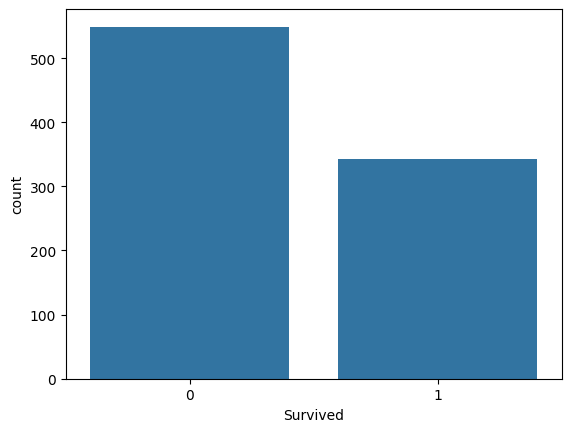

In [17]:
# Visualize the count of survived vs not survived
sb.countplot(x='Survived', data=tdata)

<Axes: xlabel='Survived', ylabel='count'>

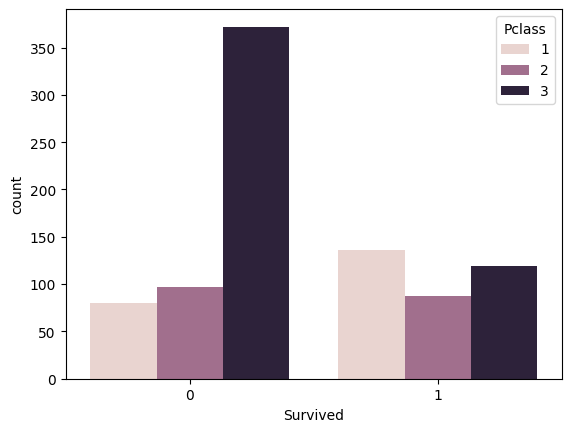

In [18]:
# Visualize the count of survived vs not survived based on Pclass
sb.countplot(x='Survived', hue='Pclass', data=tdata)

<Axes: xlabel='Survived', ylabel='count'>

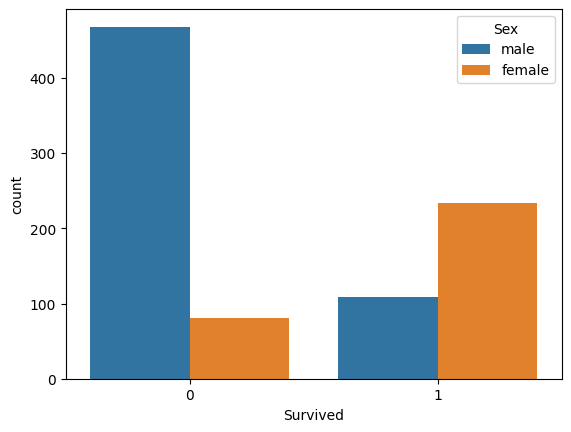

In [19]:
# Visualize the count of survived vs not survived based on Gender
sb.countplot(x='Survived', hue='Sex', data=tdata)

<Axes: xlabel='Age', ylabel='Count'>

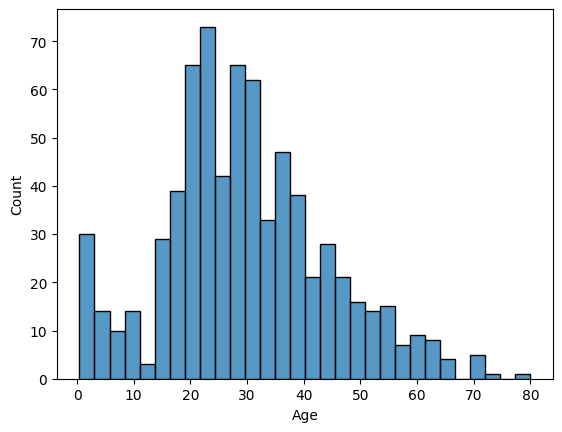

In [20]:
# Visualize the distribution of ages
sb.histplot(tdata['Age'].dropna(), bins=30)

<Axes: xlabel='Fare', ylabel='Count'>

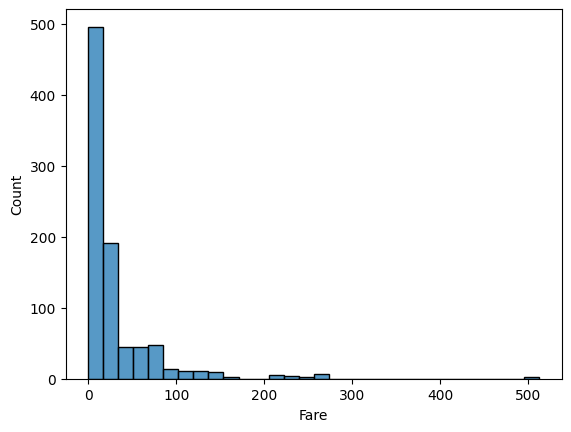

In [21]:
# Visualize the distribution of fares
sb.histplot(tdata['Fare'], bins=30)

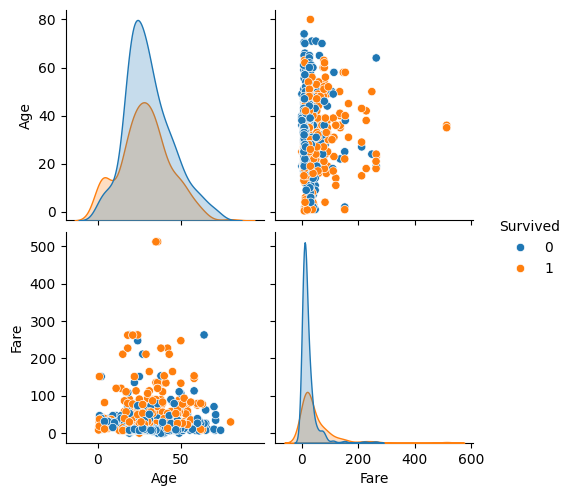

In [22]:
# Explore relationships between variables
sb.pairplot(tdata[['Age', 'Fare', 'Survived']], hue='Survived')

In [23]:
# Encode categorical variables (e.g., 'Sex')
label_encoder = LabelEncoder()
tdata['Sex'] = label_encoder.fit_transform(tdata['Sex'])

In [24]:
# Split the data into features (X) and target variable (y)
X = tdata[['Pclass', 'Sex', 'Age', 'Fare']]  # Add other features as needed
y = tdata['Survived']

In [25]:
# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Replace NaN values with the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(Xtrain)
X_test_imputed = imputer.transform(Xtest)

In [27]:
# Train a logistic regression model on imputed data
lmodel = LogisticRegression()
lmodel.fit(X_train_imputed, ytrain)

LogisticRegression()

In [28]:
# Make predictions
ypred = lmodel.predict(X_test_imputed)

In [29]:
# Evaluate the model
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7988826815642458
